In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Cat detection

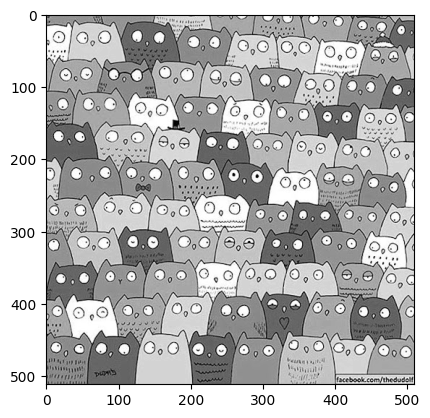

In [2]:
img = cv2.imread('image/cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

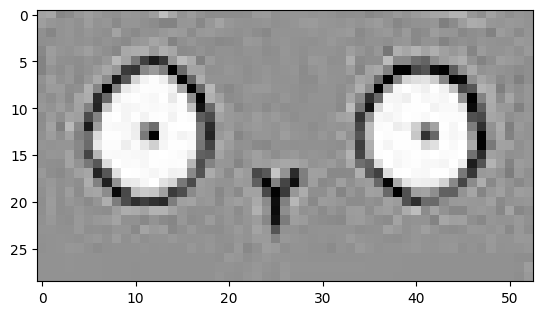

In [3]:
crop = gray[350:379, 77:130]
plt.imshow(crop, cmap='gray')

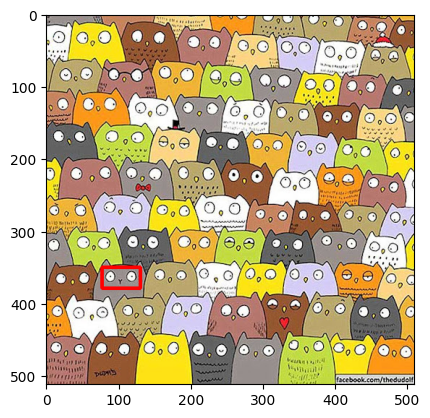

In [4]:
res = cv2.matchTemplate(gray, crop, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + crop.shape[1], top_left[1] + crop.shape[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.rectangle(img, top_left, bottom_right, (255, 0, 0), 4)
plt.imshow(img)

# Mouse detection

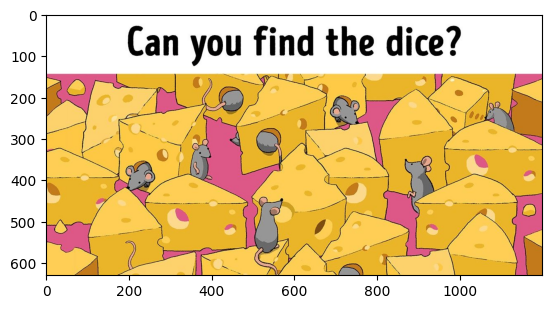

In [5]:
img2 = cv2.imread('image/mouse.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

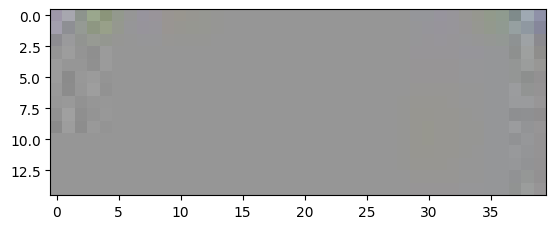

In [6]:
crop2 = img2[510:525, 515:555]
plt.imshow(crop2, cmap='gray')

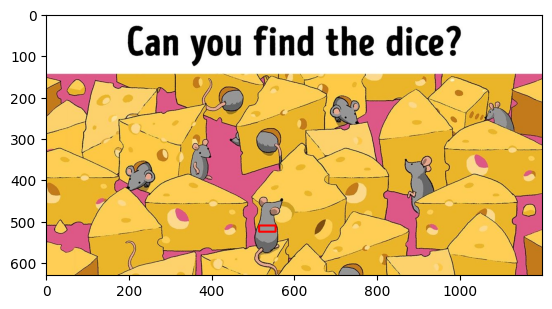

In [7]:
res2 = cv2.matchTemplate(img2, crop2, cv2.TM_CCOEFF_NORMED)
threshold = 0.4
loc = np.where(res2 >= threshold)
for pt in zip(*loc[::-1]):
	cv2.rectangle(img2, pt, (pt[0] + crop2.shape[1], pt[1] + crop2.shape[0]), (255, 0, 0), 4)
plt.imshow(img2)

It's hard to find another mouse here since they do not share the same local feature

# Boots counting

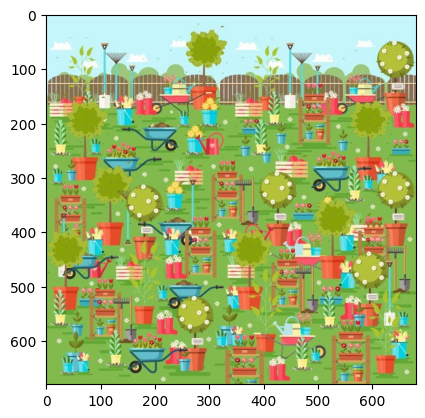

In [8]:
img3 = cv2.imread('image/pair_boot.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

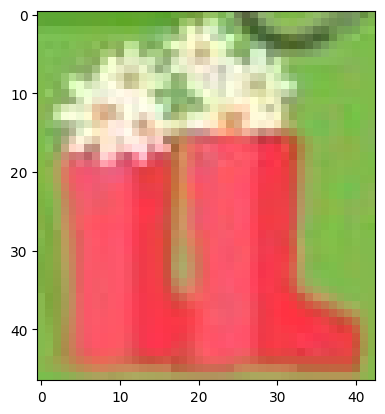

In [9]:
crop3 = img3[628:675, 407:450]
plt.imshow(crop3)

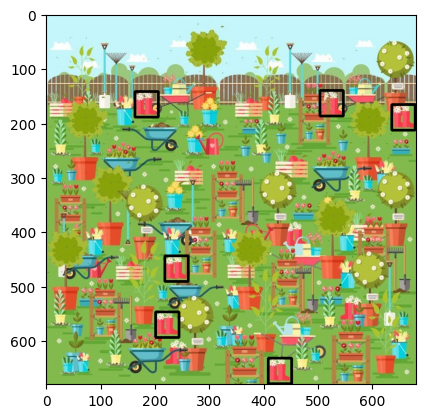

In [10]:
res3 = cv2.matchTemplate(img3, crop3, cv2.TM_CCOEFF_NORMED)
threshold = 0.65
loc = np.where(res3 >= threshold)

rects = []
for pt in zip(*loc[::-1]):
	rects.append([pt[0], pt[1], crop3.shape[1], crop3.shape[0]])
rects = np.array(rects)
pick = []
x1 = rects[:,0]
y1 = rects[:,1]
x2 = rects[:,0] + rects[:,2]
y2 = rects[:,1] + rects[:,3]
area = (x2 - x1 + 1) * (y2 - y1 + 1)
idxs = np.argsort(y2)

while len(idxs) > 0:
	last = len(idxs) - 1
	i = idxs[last]
	pick.append(i)
	xx1 = np.maximum(x1[i], x1[idxs[:last]])
	yy1 = np.maximum(y1[i], y1[idxs[:last]])
	xx2 = np.minimum(x2[i], x2[idxs[:last]])
	yy2 = np.minimum(y2[i], y2[idxs[:last]])
	w = np.maximum(0, xx2 - xx1 + 1)
	h = np.maximum(0, yy2 - yy1 + 1)
	overlap = (w * h) / area[idxs[:last]]
	idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > 0.5)[0])))
for i in pick:
	cv2.rectangle(img3, (rects[i][0], rects[i][1]), (rects[i][0] + rects[i][2], rects[i][1] + rects[i][3]), (0, 0, 0), 4)

plt.imshow(img3)

# Rabbit 1 detection

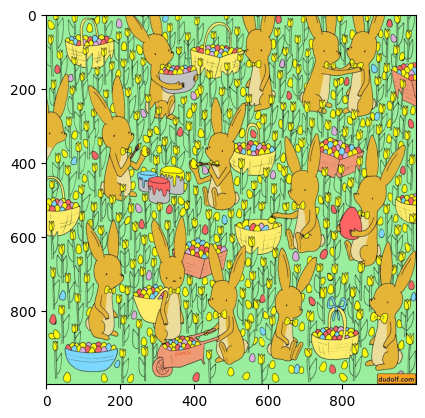

In [11]:
img4 = cv2.imread('image/rabbit.jpeg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
plt.imshow(img4)

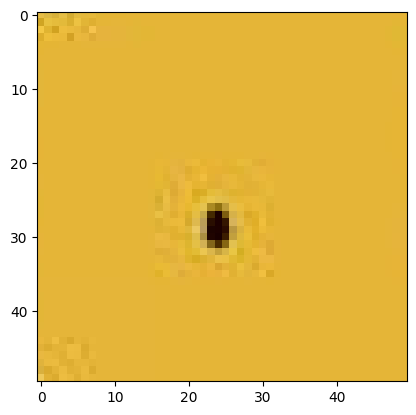

In [12]:
crop4 = img4[300:350, 160:210]
plt.imshow(crop4)

In [18]:
_, img4 = cv2.threshold(img4, 127, 255, cv2.THRESH_BINARY)
_, crop4 = cv2.threshold(crop4, 127, 255, cv2.THRESH_BINARY)

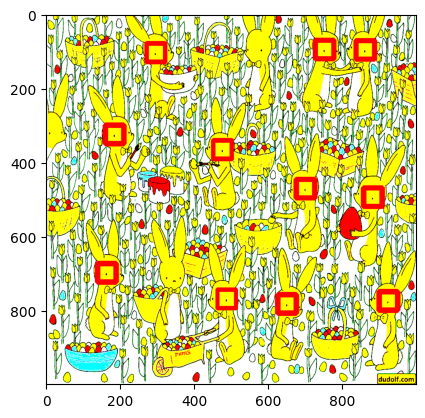

In [19]:
res4 = cv2.matchTemplate(img4, crop4, cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where(res4 >= threshold)
for pt in zip(*loc[::-1]):
	cv2.rectangle(img4, pt, (pt[0] + crop4.shape[1], pt[1] + crop4.shape[0]), (255, 0, 0), 4)
plt.imshow(img4)

# Rabbit count 2

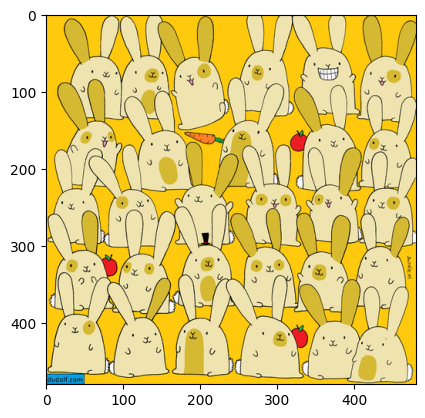

In [38]:
img5 = cv2.imread('image/rabbit2.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
plt.imshow(img5)

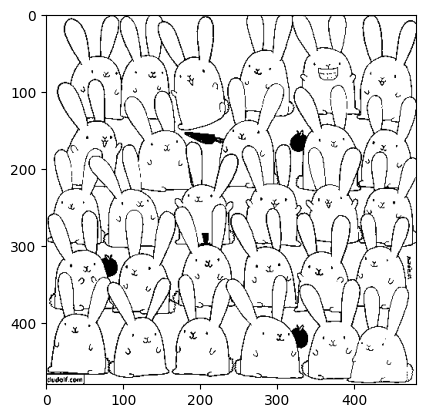

In [39]:
# Convert to binary image
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')

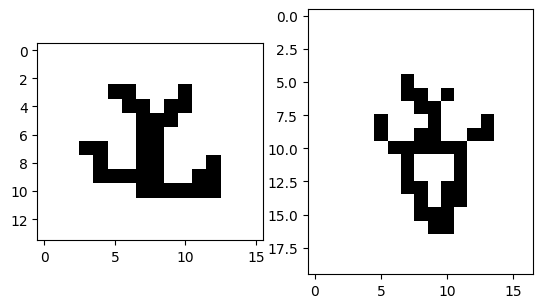

In [40]:
# There are 2 kinds of mouth in the image
crop_mouth1 = binary[152:166, 246:262]
crop_mouth2 = binary[235:255, 357:374]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(crop_mouth1, cmap='gray')
ax[1].imshow(crop_mouth2, cmap='gray')
plt.show()

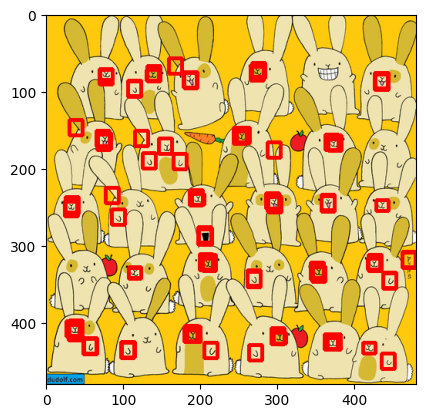

In [41]:
res5 = cv2.matchTemplate(binary, crop_mouth1, cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where(res5 >= threshold)
for pt in zip(*loc[::-1]):
	cv2.rectangle(img5, pt, (pt[0] + crop_mouth1.shape[1], pt[1] + crop_mouth1.shape[0]), (255, 0, 0), 4)

res5 = cv2.matchTemplate(binary, crop_mouth2, cv2.TM_CCOEFF_NORMED)
threshold = 0.4
loc = np.where(res5 >= threshold)
for pt in zip(*loc[::-1]):
	cv2.rectangle(img5, pt, (pt[0] + crop_mouth2.shape[1], pt[1] + crop_mouth2.shape[0]), (255, 0, 0), 4)

plt.imshow(img5)